# Table of Contents

01. Import Libraries
02. Import Data
03. Task 4.10 Part 1




# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [2]:
path = r'C:\Users\cmkep\Cathy\2022 Instacart Basket Analysis'

In [3]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers(2).pkl'))

In [4]:
dep_freq = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [4]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,Spending_flag,order_frequency,frequency_flag,state,age,#_dependants,fam_status,income,exists
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,New customer,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,New customer,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,New customer,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,New customer,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,New customer,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both


In [13]:
ords_prods_all.dtypes

order_id                     int32
user_id                      int32
order_number                  int8
orders_day_of_week            int8
order_hour_of_day             int8
days_since_prior_order     float16
product_id                   int32
add_to_cart_order            int32
reordered                     int8
product_name                object
aisle_id                     int32
department_id                 int8
prices                     float64
_merge                    category
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                     int8
loyalty_flag                object
Spending_flag               object
order_frequency            float16
frequency_flag              object
state                       object
age                           int8
#_dependants                  int8
fam_status                  object
income                       int32
exists                    category
region              

# 03. Task 4.10 Part 1

# Step 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

Step 2 Answer: The combination of first name, surname, gender and age represent a security concern. As a customer's first name, surname, and gender are irrelevant for our analyses, these columns were already dropped in Task 4.9.

# Step 3.

In [5]:
#Step 3A: Create Regions

Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [7]:
#Create 'region' flag

ords_prods_all.loc[ords_prods_all['state'].isin(Northeast), 'region'] = 'Northeast'
ords_prods_all.loc[ords_prods_all['state'].isin(Midwest), 'region'] = 'Midwest'
ords_prods_all.loc[ords_prods_all['state'].isin(South), 'region'] = 'South'
ords_prods_all.loc[ords_prods_all['state'].isin(West), 'region'] = 'West'

In [8]:
ords_prods_all['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [9]:
ords_prods_all.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Spending_flag,order_frequency,frequency_flag,state,age,#_dependants,fam_status,income,exists,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,both,South


In [10]:
# Step 3B: Determine whether there’s a difference in spending habits between the different U.S. regions.

crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['Spending_flag'], dropna = False)

In [11]:
crosstab

Spending_flag,High Spender,Low Spender
region,,
Midwest,2503257,5100553
Northeast,1880583,3847764
South,3558931,7242679
West,2729318,5571127


All regions have a higher population of customers classified as "Low Spender."

# Step 4.

In [4]:
#Step 4: create activity flag

ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'activity_flag'] = 'High Activity'
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'activity_flag'] = 'Low Activity'

In [15]:
ords_prods_all['activity_flag'].value_counts(dropna = False)

High Activity    30992664
Low Activity      1441548
Name: activity_flag, dtype: int64

In [5]:
#create Low Activity dataframe

df_Low_Activity = ords_prods_all[ords_prods_all['activity_flag'] == 'Low Activity']

In [17]:
df_Low_Activity

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,frequency_flag,state,age,#_dependants,fam_status,income,exists,region,activity_flag
1513,520620,120,1,3,11,NaN,196,2,0,Soda,...,19.0,Regular customer,Kentucky,54,2,married,99219,both,South,Low Activity
1514,3273029,120,3,2,8,19.0,196,2,1,Soda,...,19.0,Regular customer,Kentucky,54,2,married,99219,both,South,Low Activity
1515,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,19.0,Regular customer,Kentucky,54,2,married,99219,both,South,Low Activity
1516,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,19.0,Regular customer,Kentucky,54,2,married,99219,both,South,Low Activity
1517,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,19.0,Regular customer,Kentucky,54,2,married,99219,both,South,Low Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434181,1947537,166751,3,4,7,0.0,49001,1,1,Melatonin 2.5 Mg Sublingual Orange Tablets,...,10.0,Frequent customer,Oregon,38,1,married,41766,both,West,Low Activity
32434208,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Tennessee,22,3,married,46151,both,South,Low Activity
32434209,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Tennessee,22,3,married,46151,both,South,Low Activity
32434210,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Tennessee,22,3,married,46151,both,South,Low Activity


In [18]:
#export Low Activity dataframe

df_Low_Activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','Low_Activity_dataframe.pkl'))

In [6]:
#create High Activity dataframe

df_High_Activity = ords_prods_all[ords_prods_all['activity_flag'] == 'High Activity']

In [20]:
df_High_Activity

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,frequency_flag,state,age,#_dependants,fam_status,income,exists,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Alabama,31,3,married,40423,both,South,High Activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Alabama,31,3,married,40423,both,South,High Activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Alabama,31,3,married,40423,both,South,High Activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Alabama,31,3,married,40423,both,South,High Activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Alabama,31,3,married,40423,both,South,High Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434203,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,7.0,Frequent customer,Hawaii,25,0,single,53755,both,West,High Activity
32434204,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,7.0,Frequent customer,Hawaii,25,0,single,53755,both,West,High Activity
32434205,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,7.0,Frequent customer,Hawaii,25,0,single,53755,both,West,High Activity
32434206,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,7.0,Frequent customer,Hawaii,25,0,single,53755,both,West,High Activity


In [21]:
#export High Activity dataframe

df_High_Activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','High_Activity_dataframe.pkl'))

# Step 5.

In [11]:
#Step 5: create age group flag

df_High_Activity.loc[df_High_Activity['age'] <= 30, 'age_flag'] = 'Young Adult'
df_High_Activity.loc[(df_High_Activity['age'] > 30) & (df_High_Activity['age'] < 65), 'age_flag'] = 'Middle Age'
df_High_Activity.loc[df_High_Activity['age'] > 65, 'age_flag'] = 'Senior'

C:\Users\cmkep\AppData\Local\Temp\ipykernel_27100\2942247742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_High_Activity.loc[df_High_Activity['age'] <= 30, 'age_flag'] = 'Young Adult'


In [12]:
df_High_Activity['age_flag'].value_counts()

Middle Age     16479805
Senior          7737619
Young Adult     6310113
Name: age_flag, dtype: int64

In [26]:
#Step 5: create income level flag

df_High_Activity.loc[df_High_Activity['income'] <= 50000, 'income_flag'] = 'Low Income'
df_High_Activity.loc[(df_High_Activity['income'] > 50000) & (df_High_Activity['income'] <= 150000), 'income_flag'] = 'Middle Income'
df_High_Activity.loc[df_High_Activity['income'] > 150000, 'income_flag'] = 'High income'

In [27]:
df_High_Activity['income_flag'].value_counts()

Middle Income    23728607
High income       3897908
Low Income        3366149
Name: income_flag, dtype: int64

In [178]:
#Step 5: create dependants flag

df_High_Activity.loc[df_High_Activity['#_dependants'] > 0, 'dependants_flag'] = 'Dependants'
df_High_Activity.loc[df_High_Activity['#_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

In [31]:
df_High_Activity['dependants_flag'].value_counts()

Family    23245632
Single     7747032
Name: dependants_flag, dtype: int64

In [55]:
#Step 5: Create alcohol flag (department_id for alcohol is 5) 

result = []

for value in df_High_Activity["department_id"]:
  if value == 5:
    result.append("purchased")
  else:
    result.append("not purchased")

In [57]:
df_High_Activity['alcohol_flag'] = result

C:\Users\cmkep\AppData\Local\Temp\ipykernel_428\3069928192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_High_Activity['alcohol_flag'] = result


In [58]:
df_High_Activity['alcohol_flag'].value_counts()

not purchased    30847990
purchased          144674
Name: alcohol_flag, dtype: int64

In [90]:
df_High_Activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,exists,region,activity_flag,age_flag,income_flag,dependants_flag,alcohol_flag,bulk_flag,alcohol_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,both,South,High Activity,Middle Age,Low Income,Family,not purchased,not purchased,0
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,40423,both,South,High Activity,Middle Age,Low Income,Family,not purchased,not purchased,0
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,40423,both,South,High Activity,Middle Age,Low Income,Family,not purchased,not purchased,0
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,40423,both,South,High Activity,Middle Age,Low Income,Family,not purchased,not purchased,0
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,both,South,High Activity,Middle Age,Low Income,Family,not purchased,not purchased,0


In [91]:
df_High_Activity.drop(columns = ['alcohol_status'])

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,exists,region,activity_flag,age_flag,income_flag,dependants_flag,alcohol_flag,bulk_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,both,South,High Activity,Middle Age,Low Income,Family,not purchased,not purchased
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,both,South,High Activity,Middle Age,Low Income,Family,not purchased,not purchased
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,both,South,High Activity,Middle Age,Low Income,Family,not purchased,not purchased
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,both,South,High Activity,Middle Age,Low Income,Family,not purchased,not purchased
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,both,South,High Activity,Middle Age,Low Income,Family,not purchased,not purchased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434203,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,single,53755,both,West,High Activity,Young Adult,Middle Income,Single,not purchased,not purchased
32434204,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,single,53755,both,West,High Activity,Young Adult,Middle Income,Single,not purchased,not purchased
32434205,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,single,53755,both,West,High Activity,Young Adult,Middle Income,Single,not purchased,not purchased
32434206,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,single,53755,both,West,High Activity,Young Adult,Middle Income,Single,not purchased,not purchased


In [7]:
#Step 5: create bulk purchase flag (department ID for bulk is 10)

result = []

for value in df_High_Activity["department_id"]:
  if value == 10:
    result.append("purchased")
  else:
    result.append("not purchased")


In [8]:
df_High_Activity['bulk_flag'] = result

C:\Users\cmkep\AppData\Local\Temp\ipykernel_27100\1471878341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_High_Activity['bulk_flag'] = result


In [9]:
df_High_Activity['bulk_flag'].value_counts()

not purchased    30959213
purchased           33451
Name: bulk_flag, dtype: int64

# Step 6.

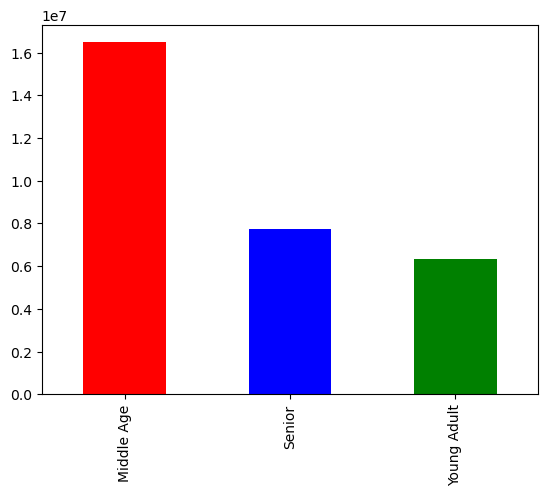

In [71]:
#Step 6: Create age group visualization

age_flag_bar = df_High_Activity['age_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

In [72]:
#export age visual

age_flag_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_flag_bar.png'))

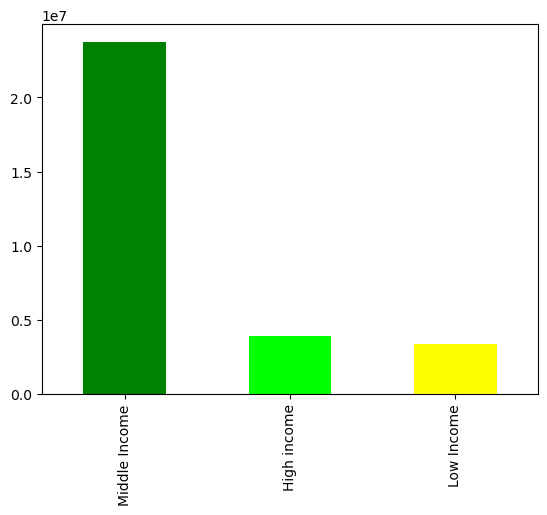

In [75]:
#Step 6: income visualization

income_flag_bar = df_High_Activity['income_flag'].value_counts().plot.bar(color = ['green', 'lime', 'yellow'])

In [76]:
#export income visual

income_flag_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_flag_bar.png'))

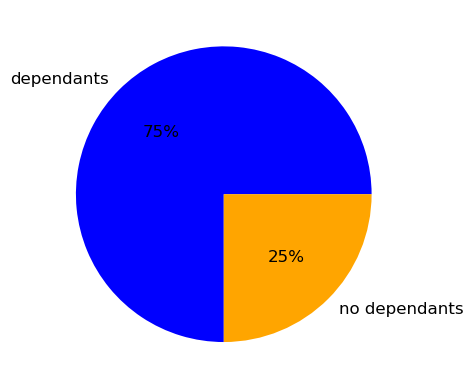

In [78]:
#Step 6: create dependants flag visual

dependants_flag_pie = df_High_Activity['dependants_flag'].value_counts().plot.pie(label='', labels=['dependants', 'no dependants'],autopct=('%1.f%%'), colors=['blue','orange'], textprops={'fontsize': 12})

In [79]:
#export dependants visual

dependants_flag_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_flag_pie.png'))

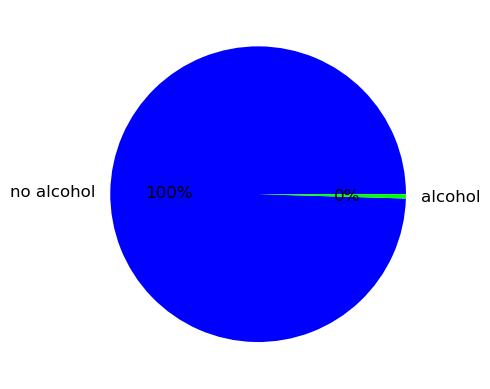

In [87]:
#Step 6: create alcohol flag visual

alcohol_flag_pie = df_High_Activity['alcohol_flag'].value_counts().plot.pie(label='', labels=['no alcohol', 'alcohol'],autopct=('%1.f%%'), colors=['blue','lime'], textprops={'fontsize': 12})

In [88]:
#export alcohol flag visual

alcohol_flag_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_flag_pie.png'))

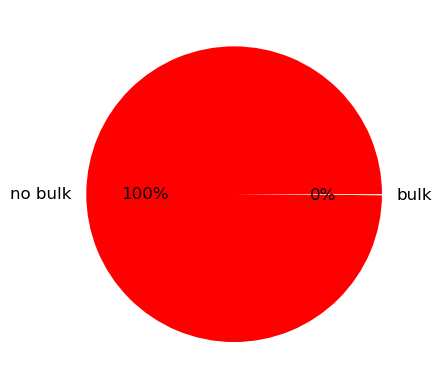

In [189]:
#Step 6: create bulk flag visual

bulk_flag_pie = df_High_Activity['bulk_flag'].value_counts().plot.pie(label='', labels=['no bulk', 'bulk'],autopct=('%1.f%%'), colors=['red','mistyrose'], textprops={'fontsize': 12})

In [89]:
#export bulk flag visual

bulk_flag_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bulk_flag_pie.png'))

# Step 7.

In [92]:
#Step 7: age flag and usage frequency 

df_High_Activity.groupby('age_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                       mean  min   max
age_flag                              
Middle Age         9.960938  0.0  30.0
Senior             9.937500  0.0  30.0
Young Adult        9.968750  0.0  30.0

In [93]:
#Step 7: age flag and expenditure

df_High_Activity.groupby('age_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_flag                        
Middle Age   7.795775  1.0  25.0
Senior       7.798995  1.0  25.0
Young Adult  7.786221  1.0  25.0

In [94]:
#Step 7: income flag and usage frequency 

df_High_Activity.groupby('income_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                         mean  min   max
income_flag                             
High income          9.789062  0.0  30.0
Low Income          10.515625  0.0  30.0
Middle Income        9.906250  0.0  30.0

In [95]:
#Step 7: income flag and expenditure

df_High_Activity.groupby('income_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_flag                       
High income    7.945383  1.0  25.0
Low Income     6.713149  1.0  25.0
Middle Income  7.924204  1.0  25.0

In [96]:
#Step 7: dependants flag and usage frequency 

df_High_Activity.groupby('dependants_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                           mean  min   max
dependants_flag                           
Family                 9.960938  0.0  30.0
Single                 9.937500  0.0  30.0

In [97]:
#Step 7: dependants flag and expenditure

df_High_Activity.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
dependants_flag                     
Family           7.795591  1.0  25.0
Single           7.794471  1.0  25.0

In [98]:
#Step 7: alcohol flag and usage frequency 

df_High_Activity.groupby('alcohol_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                         mean  min   max
alcohol_flag                            
not purchased        9.960938  0.0  30.0
purchased            9.539062  0.0  30.0

In [99]:
#Step 7: alcohol flag and expenditure

df_High_Activity.groupby('alcohol_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
alcohol_flag                      
not purchased  7.793640  1.0  25.0
purchased      8.151446  1.0  15.0

In [100]:
#Step 7: bulk flag and usage frequency 

df_High_Activity.groupby('bulk_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                         mean  min   max
bulk_flag                               
not purchased        9.960938  0.0  30.0
purchased            9.062500  0.0  30.0

In [101]:
#Step 7: bulk flag and expenditure

df_High_Activity.groupby('bulk_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
bulk_flag                         
not purchased  7.794715  1.0  25.0
purchased      8.346919  1.4  14.1

# Step 8.

In [102]:
#Step 8: create crosstab for age flag and region

age_flag_crosstab = pd.crosstab(df_High_Activity['age_flag'], df_High_Activity['region'], dropna = False)

In [103]:
age_flag_crosstab

region,Midwest,Northeast,South,West
age_flag,,,,
Middle Age,3899971,2871118,5480681,4228035
Senior,1800968,1395878,2551237,1989536
Young Adult,1462264,1112686,2128951,1606212


In [104]:
#Step 8: create crosstab for income flag and region

income_flag_crosstab = pd.crosstab(df_High_Activity['income_flag'], df_High_Activity['region'], dropna = False)

In [105]:
income_flag_crosstab

region,Midwest,Northeast,South,West
income_flag,,,,
High income,917753,678310,1291471,1010374
Low Income,784517,587850,1143857,849925
Middle Income,5565437,4203908,7885134,6074128


In [106]:
#Step 8: create crosstab for dependants flag and region

dependants_flag_crosstab = pd.crosstab(df_High_Activity['dependants_flag'], df_High_Activity['region'], dropna = False)

In [107]:
dependants_flag_crosstab

region,Midwest,Northeast,South,West
dependants_flag,,,,
Family,5443220,4114240,7736110,5952062
Single,1824487,1355828,2584352,1982365


In [108]:
#Step 8: create crosstab for alcohol flag and region

alcohol_flag_crosstab = pd.crosstab(df_High_Activity['alcohol_flag'], df_High_Activity['region'], dropna = False)

In [111]:
alcohol_flag_crosstab

region,Midwest,Northeast,South,West
alcohol_flag,,,,
not purchased,7233655,5445034,10271640,7897661
purchased,34052,25034,48822,36766


In [112]:
#Step 8: create crosstab for bulk flag and region

bulk_flag_crosstab = pd.crosstab(df_High_Activity['bulk_flag'], df_High_Activity['region'], dropna = False)

In [113]:
bulk_flag_crosstab

region,Midwest,Northeast,South,West
bulk_flag,,,,
not purchased,7259778,5464469,10309282,7925684
purchased,7929,5599,11180,8743


# Step 9.

In [115]:
#Step 9: create crosstab for age group by region
age_region_crosstab = pd.crosstab(df_High_Activity['region'], columns = df_High_Activity['age_flag'])

# creating crosstab labels
age_region_crosstab_labels = pd.crosstab(df_High_Activity['region'], columns = df_High_Activity['age_flag'])

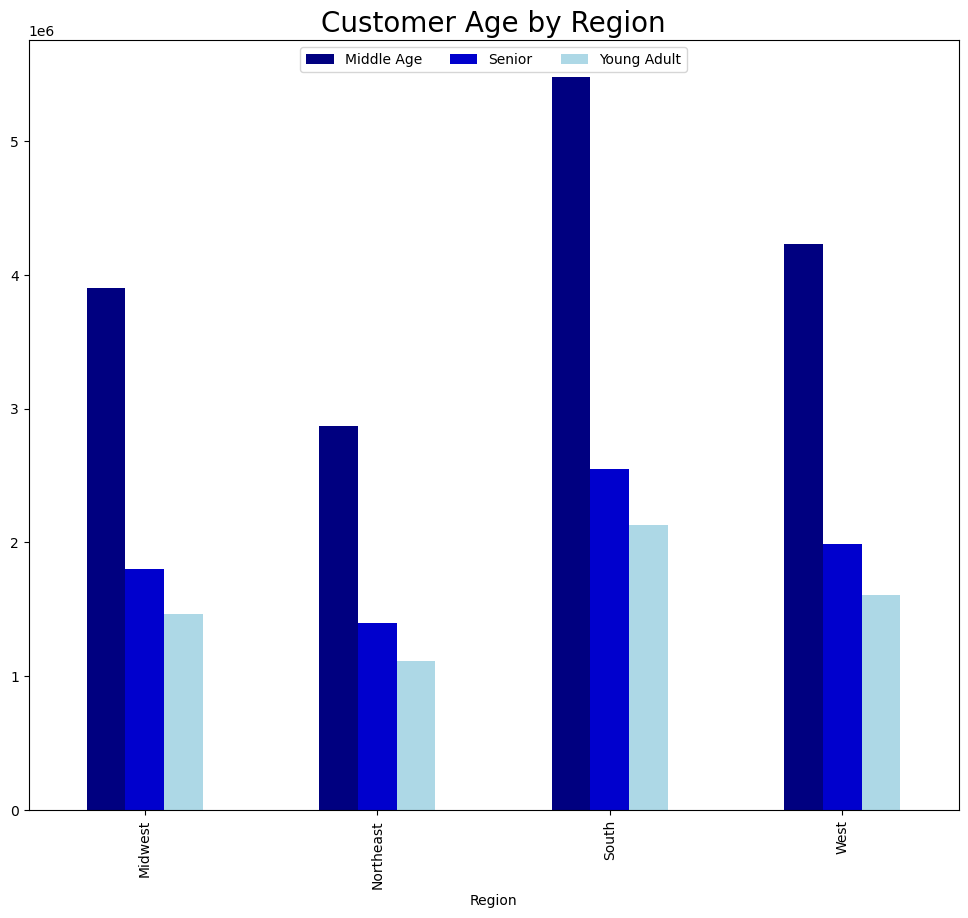

In [120]:
#Step 9: create visualization for age group and region

age_region_bar = age_region_crosstab.plot(kind ='bar', stacked = False, color = ['navy','mediumblue','lightblue'], figsize = (12,10))
plt.title('Customer Age by Region', fontsize = 20)
plt.legend(loc ="upper center", ncol = 3)
plt.xlabel("Region")
plt.show()

In [121]:
#export customer age by region visual

age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'))

In [167]:
#Step 9: create crosstab for income level and region
income_region=pd.crosstab(index=df_High_Activity['region'], columns=df_High_Activity['income_flag'], normalize="index")
#create crosstab labels
income_region_labels=pd.crosstab(index=df_High_Activity['region'],columns=df_High_Activity['income_flag'])

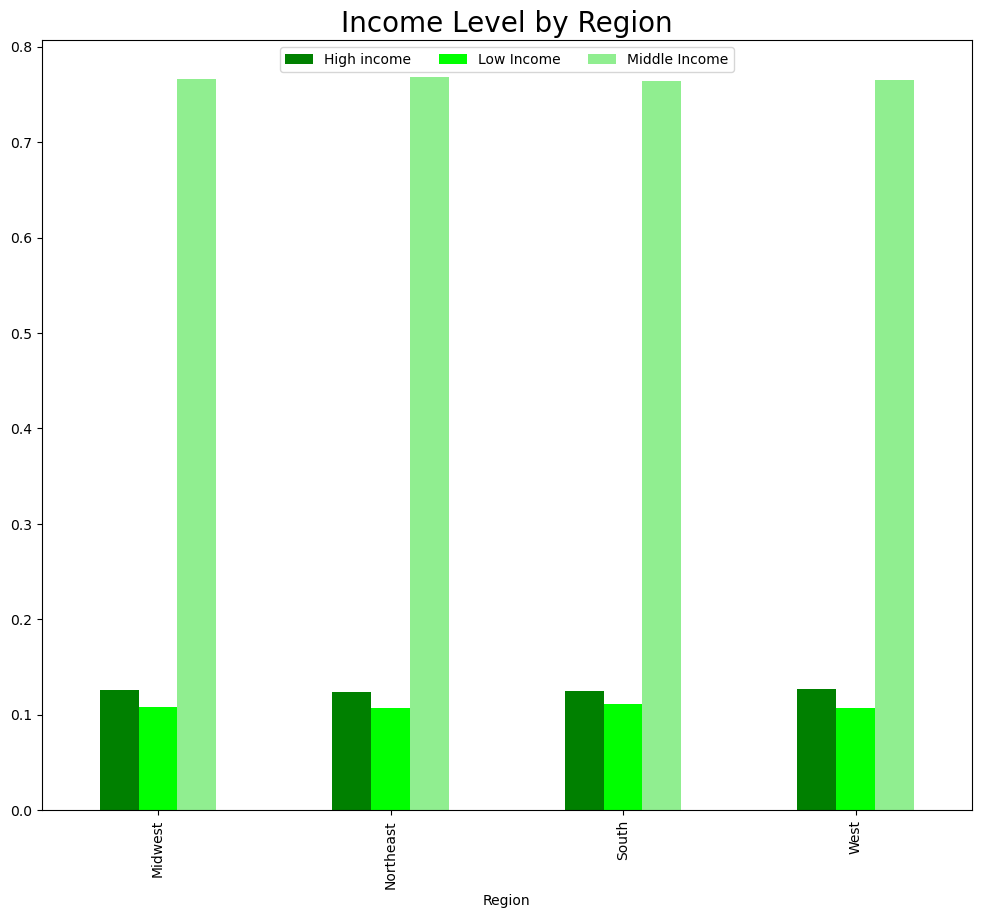

In [170]:
#creating bar chart for income level by region
income_region_bar=income_region.plot(kind='bar', 
                        stacked=False, 
                        color=['green','lime','lightgreen'], 
                        figsize=(12,10))

plt.title('Income Level by Region', fontsize=20)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")
plt.show()

In [171]:
#export income by region bar chart
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_bar.png'))

In [179]:
#Step 9: create crosstab for dependants flag by region
dependants_region_bar = pd.crosstab(df_High_Activity['region'], columns = df_High_Activity['dependants_flag'])

# create crosstab labels
dependants_region_bar_labels = pd.crosstab(df_High_Activity['region'], columns = df_High_Activity['dependants_flag'])

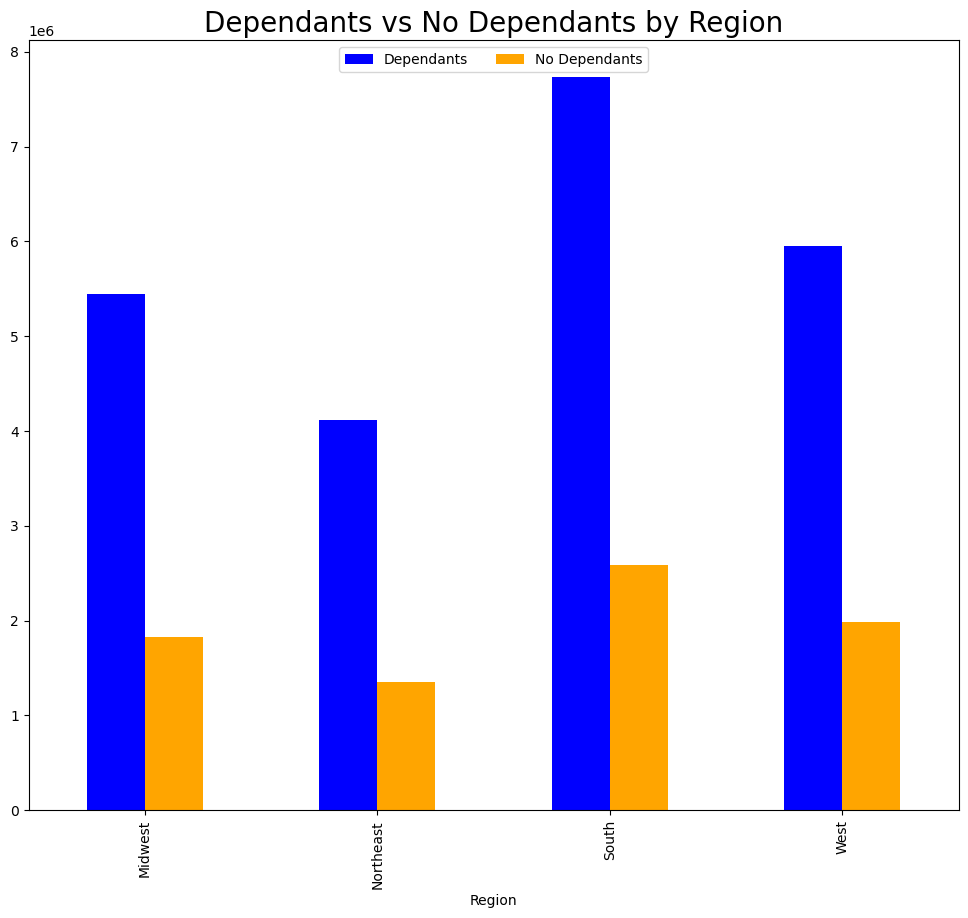

In [180]:
#Step 9: create visualization for dependants flag and region

dependants_region_bar = dependants_region_bar.plot(kind ='bar', stacked = False, color = ['blue','orange'], figsize = (12,10))
plt.title('Dependants vs No Dependants by Region', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [181]:
#export dependants flag by region visual

dependants_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_region_bar.png'))

In [185]:
#Step 9: create crosstab for alcohol flag by region
alcohol_region_bar = pd.crosstab(df_High_Activity['region'], columns = df_High_Activity['alcohol_flag'])

# create crosstab labels
alcohol_region_bar_labels = pd.crosstab(df_High_Activity['region'], columns = df_High_Activity['alcohol_flag'])

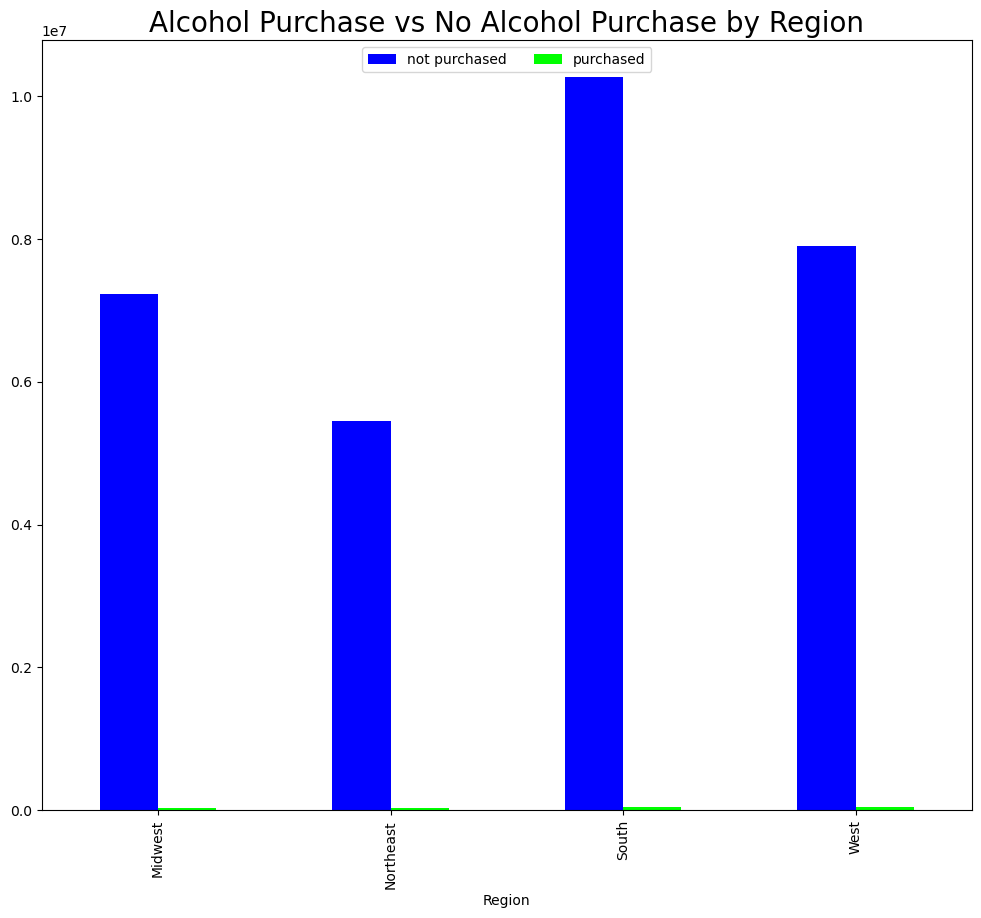

In [186]:
#Step 9: create visualization for alcohol flag and region

alcohol_region_bar = alcohol_region_bar.plot(kind ='bar', stacked = False, color = ['blue','lime'], figsize = (12,10))
plt.title('Alcohol Purchase vs No Alcohol Purchase by Region', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [187]:
#export alcohol flag by region visual

alcohol_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_region_bar.png'))

In [190]:
#Step 9: create crosstab for bulk flag by region
bulk_region_bar = pd.crosstab(df_High_Activity['region'], columns = df_High_Activity['bulk_flag'])

# create crosstab labels
bulk_region_bar_labels = pd.crosstab(df_High_Activity['region'], columns = df_High_Activity['bulk_flag'])

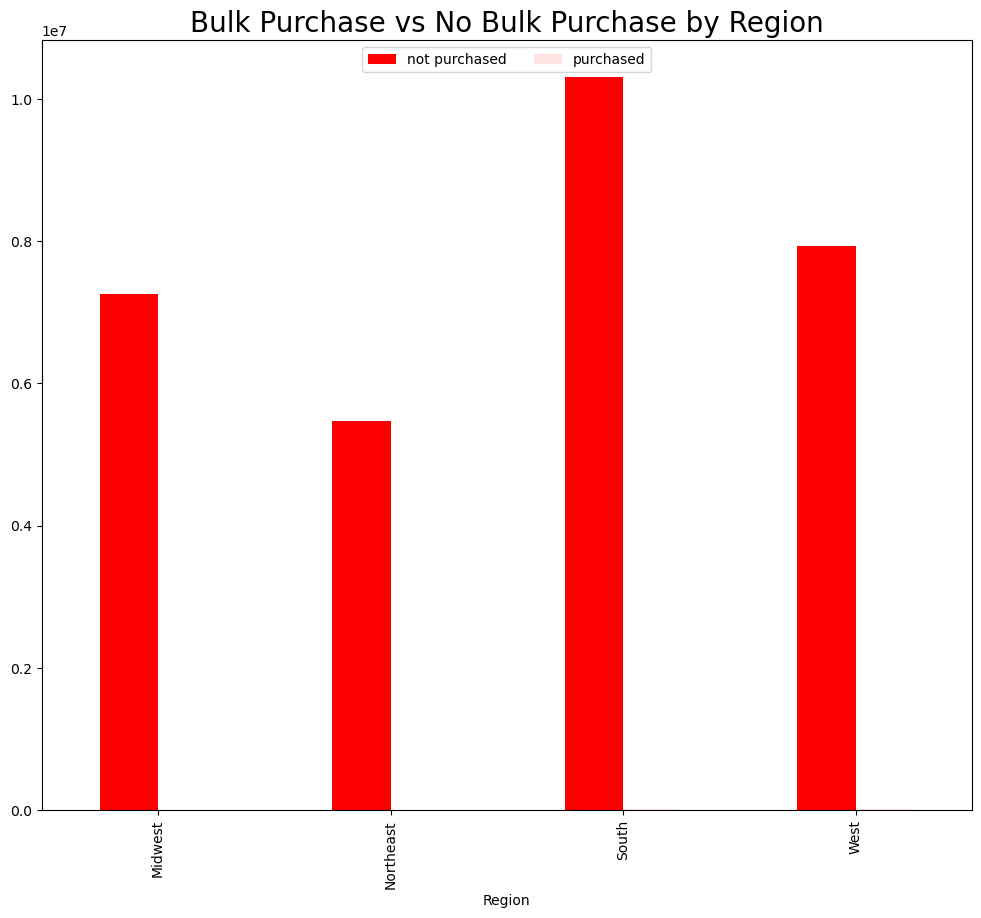

In [191]:
#Step 9: create visualization for bulk flag and region

bulk_region_bar = bulk_region_bar.plot(kind ='bar', stacked = False, color = ['red','mistyrose'], figsize = (12,10))
plt.title('Bulk Purchase vs No Bulk Purchase by Region', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [192]:
#export bulk flag by region visual

bulk_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bulk_region_bar.png'))

In [193]:
#Step 9: create crosstab for age flag by income flag
age_income_bar = pd.crosstab(df_High_Activity['age_flag'], columns = df_High_Activity['income_flag'])

# create crosstab labels
age_income_bar_labels = pd.crosstab(df_High_Activity['age_flag'], columns = df_High_Activity['income_flag'])

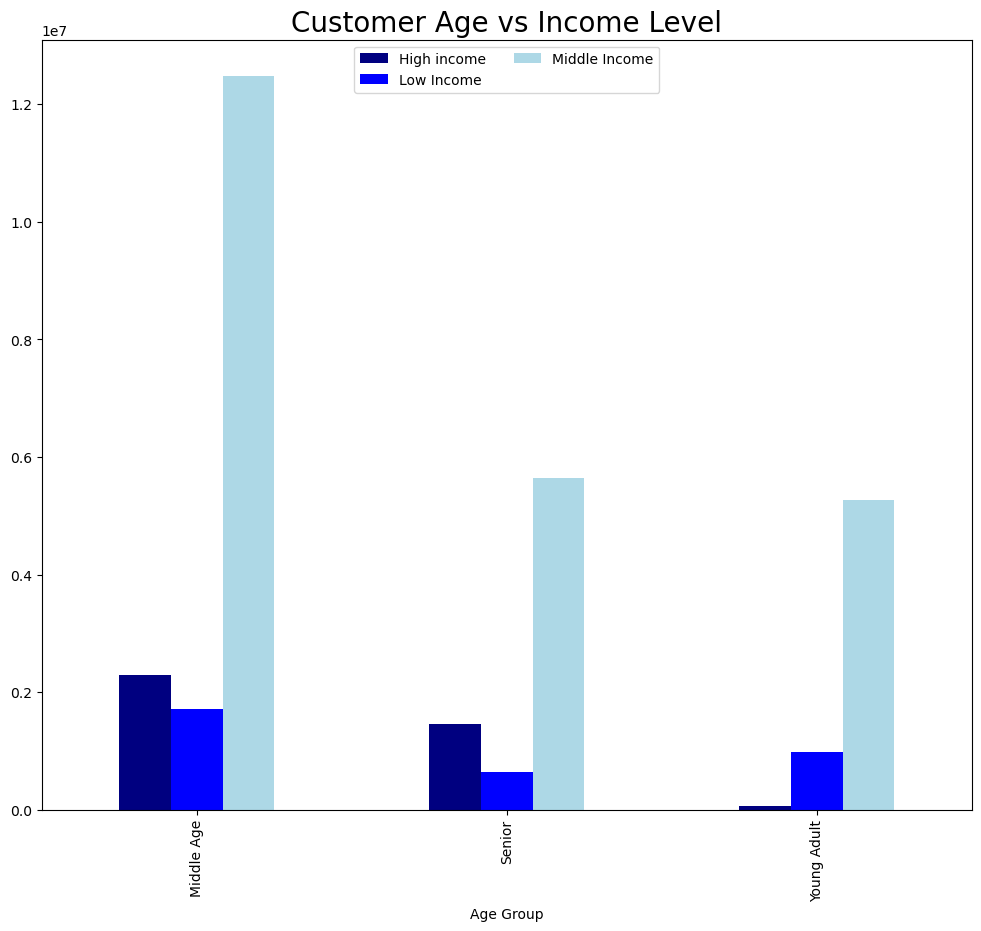

In [194]:
#Step 9: create visualization for bulk flag and region

age_income_bar = age_income_bar.plot(kind ='bar', stacked = False, color = ['navy','blue','lightblue'], figsize = (12,10))
plt.title('Customer Age vs Income Level', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Age Group")
plt.show()

In [195]:
#export age group by income visual

age_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_bar.png'))

In [196]:
#Step 9: create crosstab for age flag by dependants flag
age_dependants_bar = pd.crosstab(df_High_Activity['age_flag'], columns = df_High_Activity['dependants_flag'])

# create crosstab labels
age_dependants_bar_labels = pd.crosstab(df_High_Activity['age_flag'], columns = df_High_Activity['dependants_flag'])

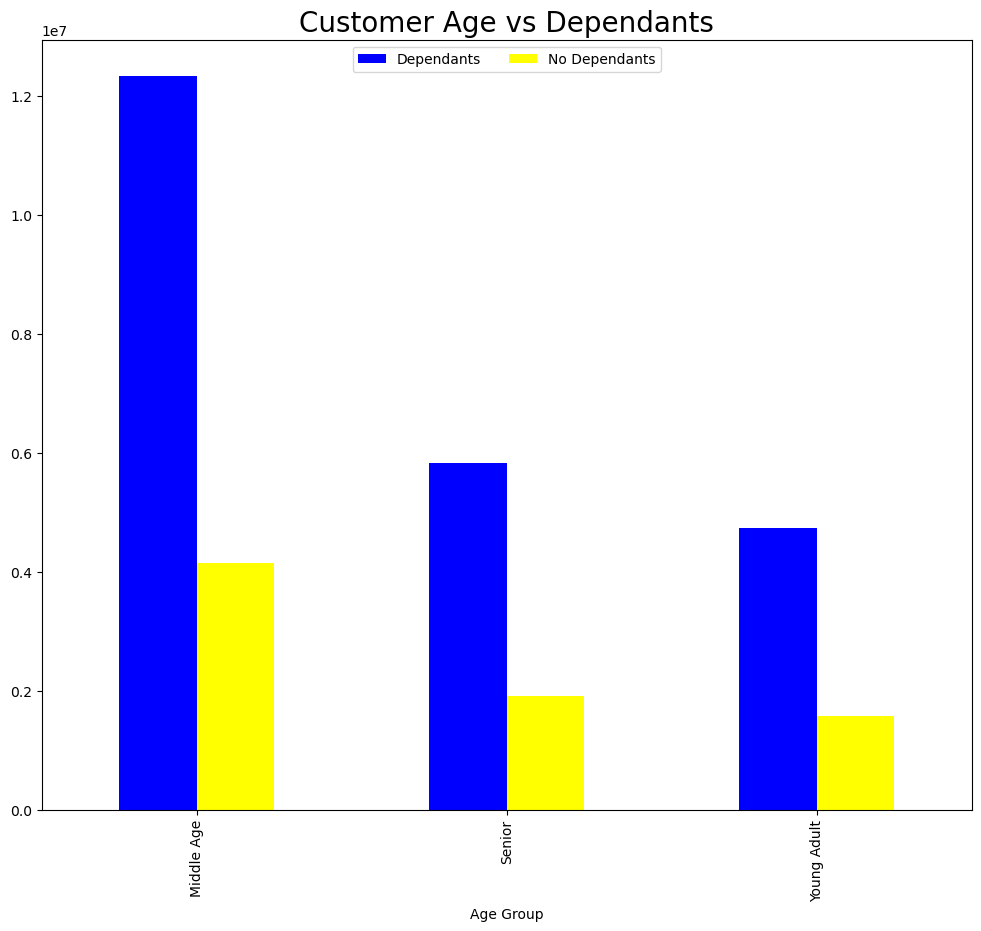

In [197]:
#Step 9: create visualization for age flag and dependants flag

age_dependants_bar = age_dependants_bar.plot(kind ='bar', stacked = False, color = ['blue','yellow'], figsize = (12,10))
plt.title('Customer Age vs Dependants', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Age Group")
plt.show()

In [198]:
#export age group by dependants visual

age_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependants_bar.png'))

In [199]:
#Step 9: create crosstab for income flag by dependants flag
income_dependants_bar = pd.crosstab(df_High_Activity['income_flag'], columns = df_High_Activity['dependants_flag'])

# create crosstab labels
income_dependants_bar_labels = pd.crosstab(df_High_Activity['income_flag'], columns = df_High_Activity['dependants_flag'])

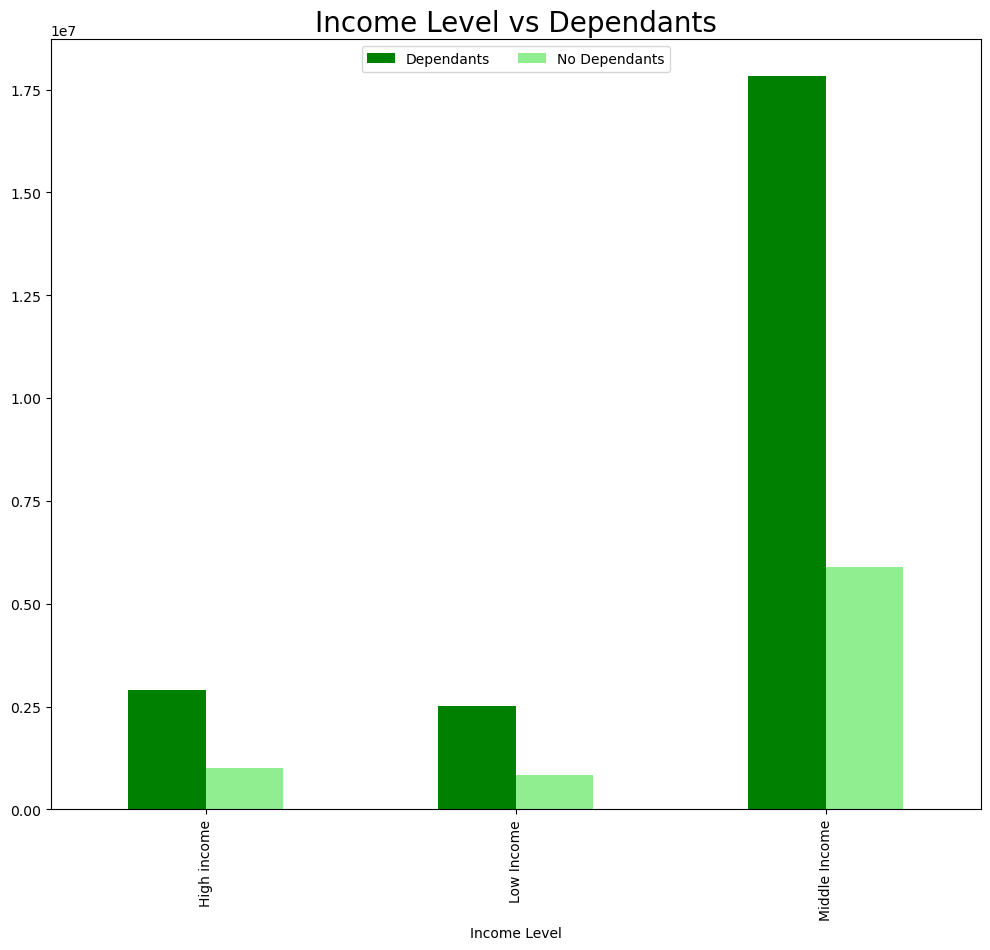

In [200]:
#Step 9: create visualization for income flag and dependants flag

income_dependants_bar = income_dependants_bar.plot(kind ='bar', stacked = False, color = ['green','lightgreen'], figsize = (12,10))
plt.title('Income Level vs Dependants', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Income Level")
plt.show()

In [201]:
#export income group by dependants visual

income_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_dependants_bar.png'))

In [204]:
#Step 9: create crosstab for bulk flag by dependants flag
bulk_dependants_bar = pd.crosstab(df_High_Activity['dependants_flag'], columns = df_High_Activity['bulk_flag'])

# create crosstab labels
bulk_dependants_bar_labels = pd.crosstab(df_High_Activity['dependants_flag'], columns = df_High_Activity['bulk_flag'])

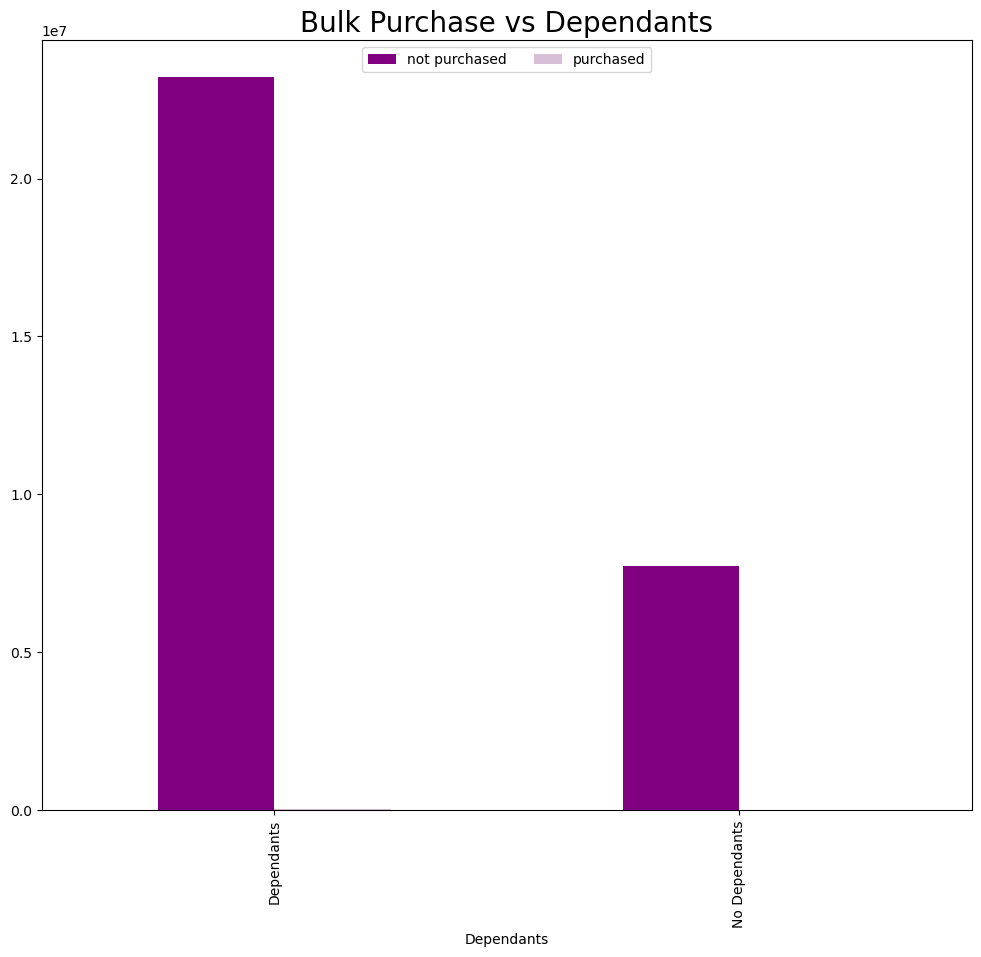

In [205]:
#Step 9: create visualization for bulk flag and dependants flag

bulk_dependants_bar = bulk_dependants_bar.plot(kind ='bar', stacked = False, color = ['purple','thistle'], figsize = (12,10))
plt.title('Bulk Purchase vs Dependants', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Dependants")
plt.show()

In [206]:
#export bulk purchase by dependants visual

bulk_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bulk_dependants_bar.png'))

In [207]:
#Step 9: create crosstab for alcohol flag by dependants flag
alcohol_dependants_bar = pd.crosstab(df_High_Activity['dependants_flag'], columns = df_High_Activity['alcohol_flag'])

# create crosstab labels
alcohol_dependants_bar_labels = pd.crosstab(df_High_Activity['dependants_flag'], columns = df_High_Activity['alcohol_flag'])

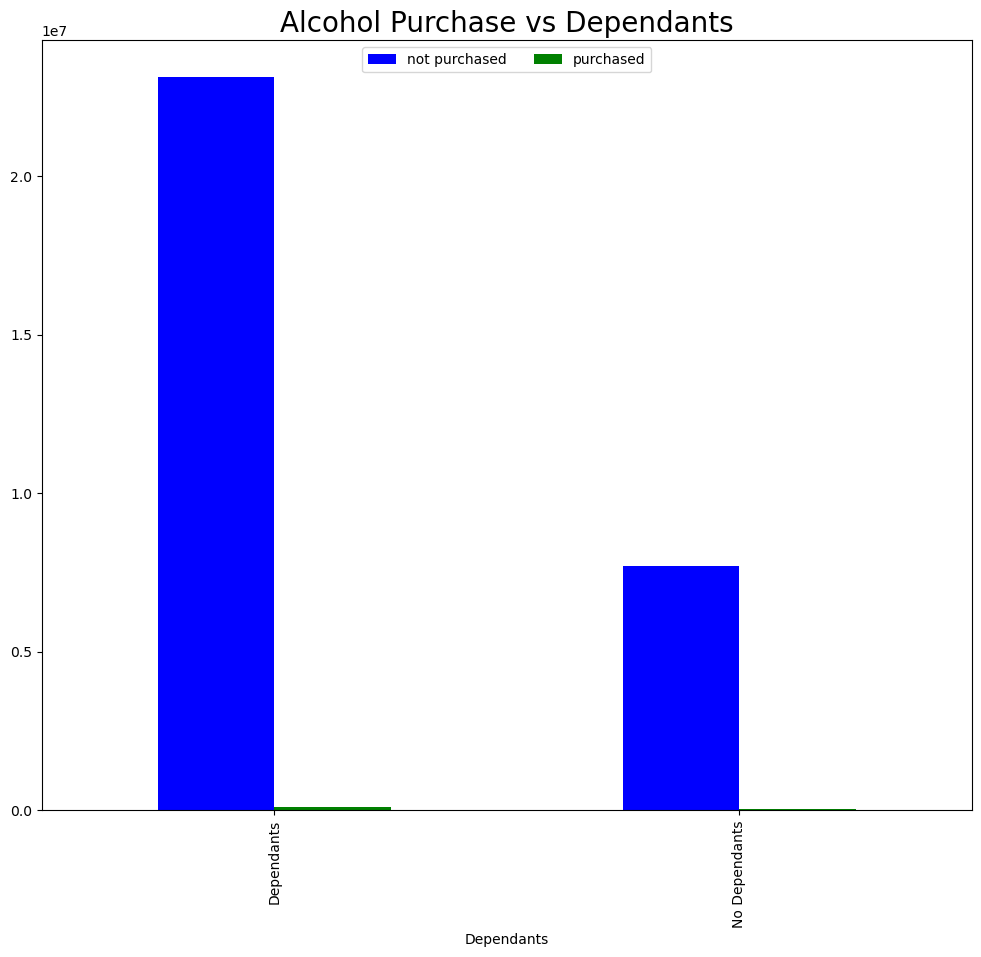

In [208]:
#Step 9: create visualization for alcohol flag and dependants flag

alcohol_dependants_bar = alcohol_dependants_bar.plot(kind ='bar', stacked = False, color = ['blue','green'], figsize = (12,10))
plt.title('Alcohol Purchase vs Dependants', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Dependants")
plt.show()

In [209]:
#export alcohol purchase by dependants visual

alcohol_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_dependants_bar.png'))

In [210]:
#Step 9: create crosstab for alcohol flag by age flag
alcohol_age_bar = pd.crosstab(df_High_Activity['age_flag'], columns = df_High_Activity['alcohol_flag'])

# create crosstab labels
alcohol_age_bar_labels = pd.crosstab(df_High_Activity['age_flag'], columns = df_High_Activity['alcohol_flag'])

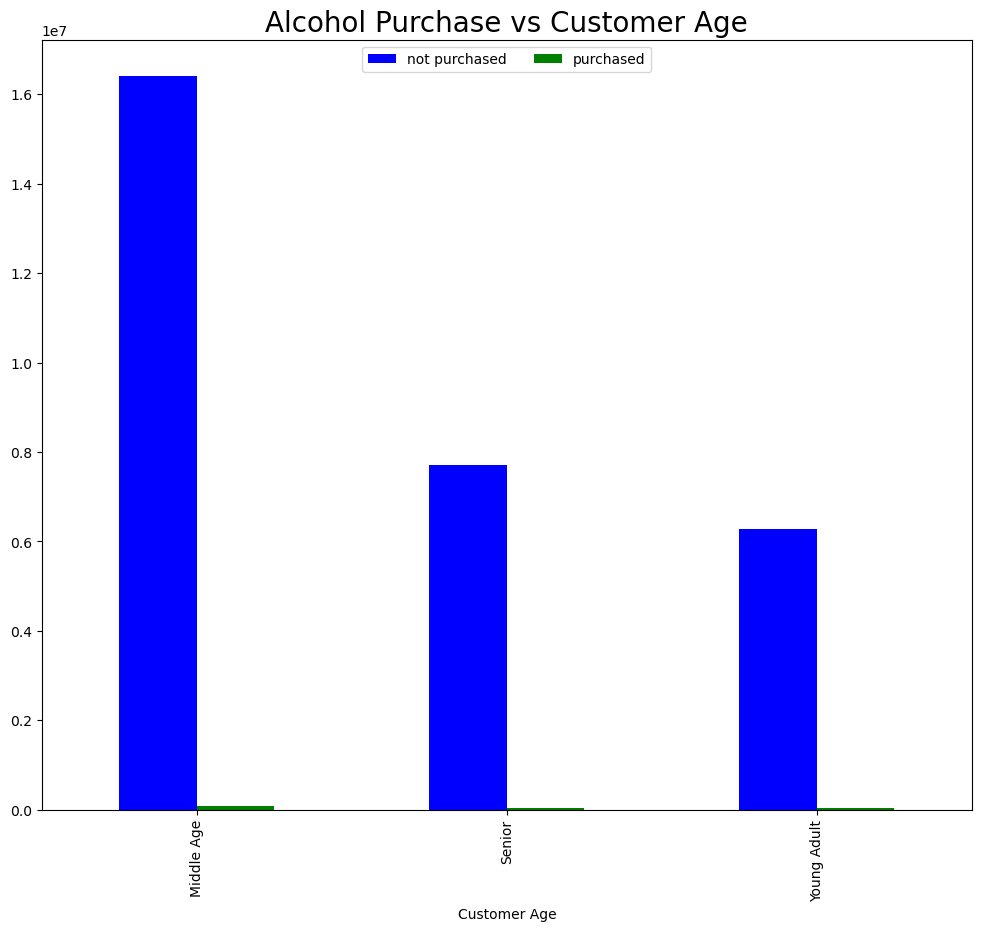

In [211]:
#Step 9: create visualization for alcohol flag and age flag

alcohol_age_bar = alcohol_age_bar.plot(kind ='bar', stacked = False, color = ['blue','green'], figsize = (12,10))
plt.title('Alcohol Purchase vs Customer Age', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Customer Age")
plt.show()

In [212]:
#export alcohol purchase by age visual

alcohol_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_age_bar.png'))

In [13]:
#Step 9: create crosstab for bulk flag by age flag
bulk_age_bar = pd.crosstab(df_High_Activity['age_flag'], columns = df_High_Activity['bulk_flag'])

# create crosstab labels
bulk_age_bar_labels = pd.crosstab(df_High_Activity['age_flag'], columns = df_High_Activity['bulk_flag'])

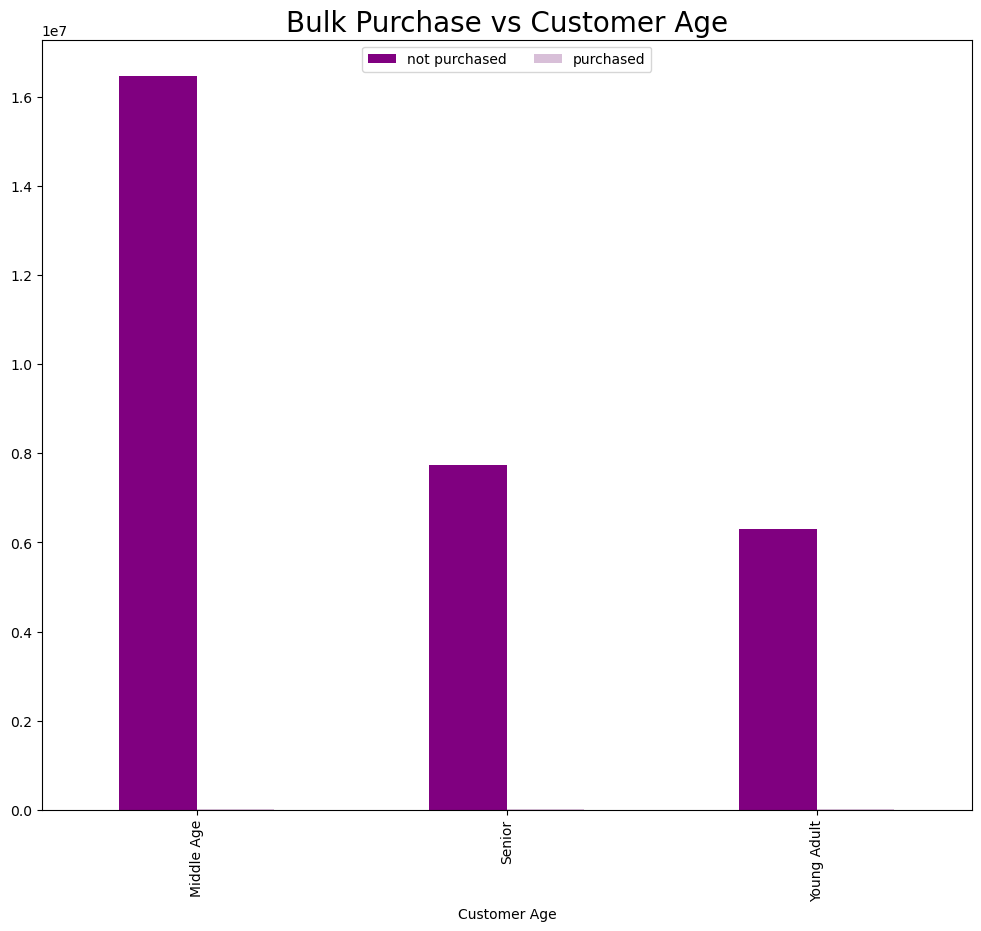

In [14]:
#Step 9: create visualization for bulk flag and age flag

bulk_age_bar = bulk_age_bar.plot(kind ='bar', stacked = False, color = ['purple','thistle'], figsize = (12,10))
plt.title('Bulk Purchase vs Customer Age', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Customer Age")
plt.show()

In [15]:
#export bulk purchase by age visual

bulk_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bulk_age_bar.png'))

In [213]:
#Step 9: create crosstab for loyalty flag by age flag
loyalty_age_bar = pd.crosstab(df_High_Activity['age_flag'], columns = df_High_Activity['loyalty_flag'])

# create crosstab labels
loyalty_age_bar_labels = pd.crosstab(df_High_Activity['age_flag'], columns = df_High_Activity['loyalty_flag'])

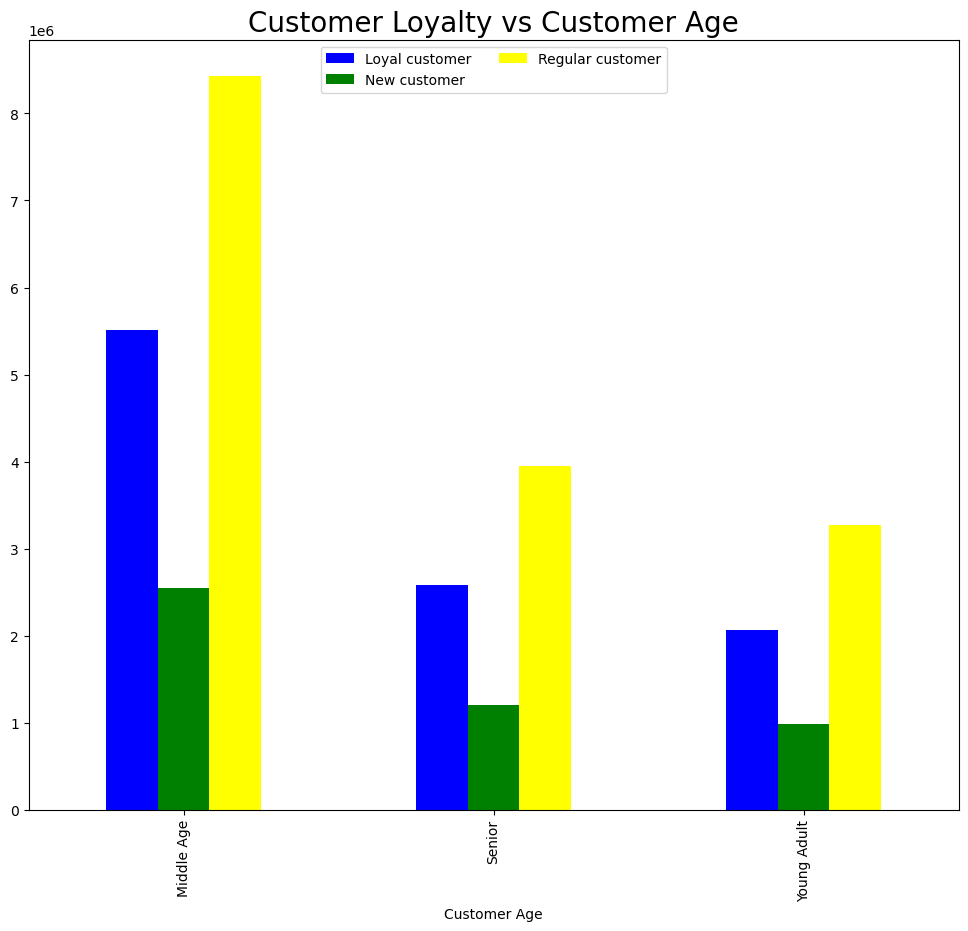

In [214]:
#Step 9: create visualization for loyalty flag and age flag

loyalty_age_bar = loyalty_age_bar.plot(kind ='bar', stacked = False, color = ['blue','green','yellow'], figsize = (12,10))
plt.title('Customer Loyalty vs Customer Age', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Customer Age")
plt.show()

In [215]:
#export loyalty purchase by age visual

loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_bar.png'))

In [216]:
#Step 9: create crosstab for loyalty flag by region
loyalty_region_bar = pd.crosstab(df_High_Activity['region'], columns = df_High_Activity['loyalty_flag'])

# create crosstab labels
loyalty_region_bar_labels = pd.crosstab(df_High_Activity['region'], columns = df_High_Activity['loyalty_flag'])

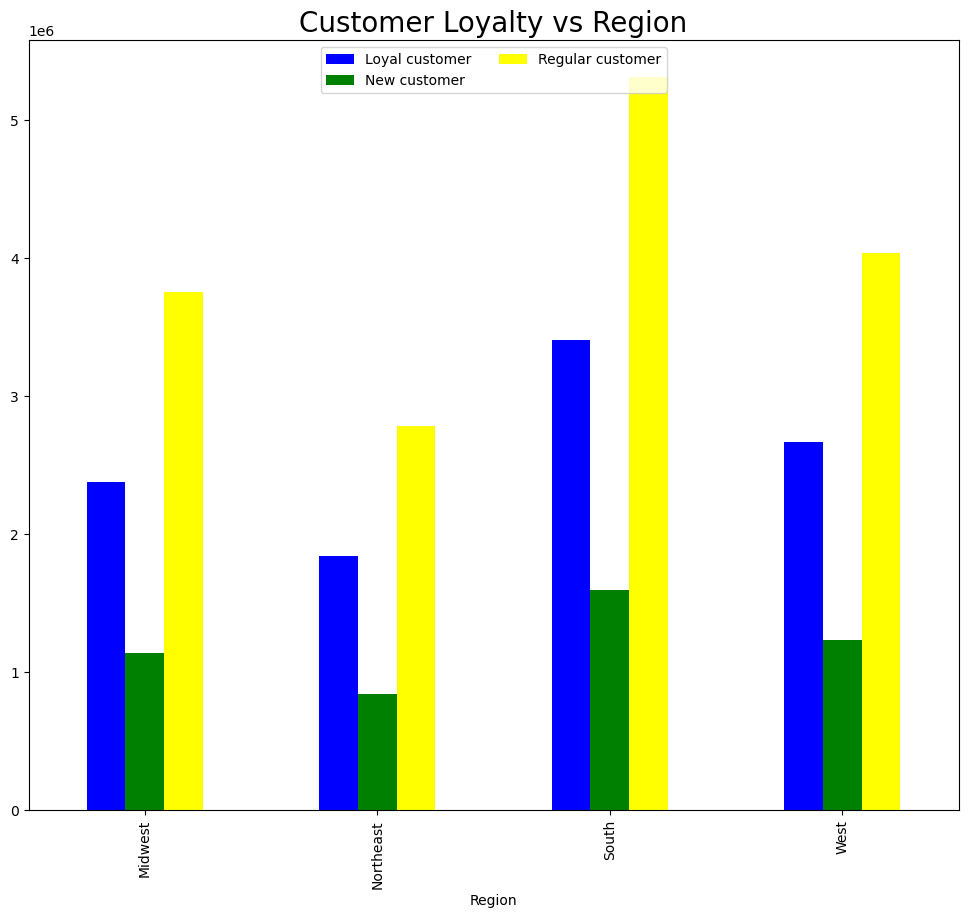

In [217]:
#Step 9: create visualization for loyalty flag and region

loyalty_region_bar = loyalty_region_bar.plot(kind ='bar', stacked = False, color = ['blue','green','yellow','red'], figsize = (12,10))
plt.title('Customer Loyalty vs Region', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [218]:
#export loyalty purchase by region visual

loyalty_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_region_bar.png'))

In [219]:
#Step 9: create crosstab for loyalty flag by income
loyalty_income_bar = pd.crosstab(df_High_Activity['income_flag'], columns = df_High_Activity['loyalty_flag'])

# create crosstab labels
loyalty_income_bar_labels = pd.crosstab(df_High_Activity['income_flag'], columns = df_High_Activity['loyalty_flag'])

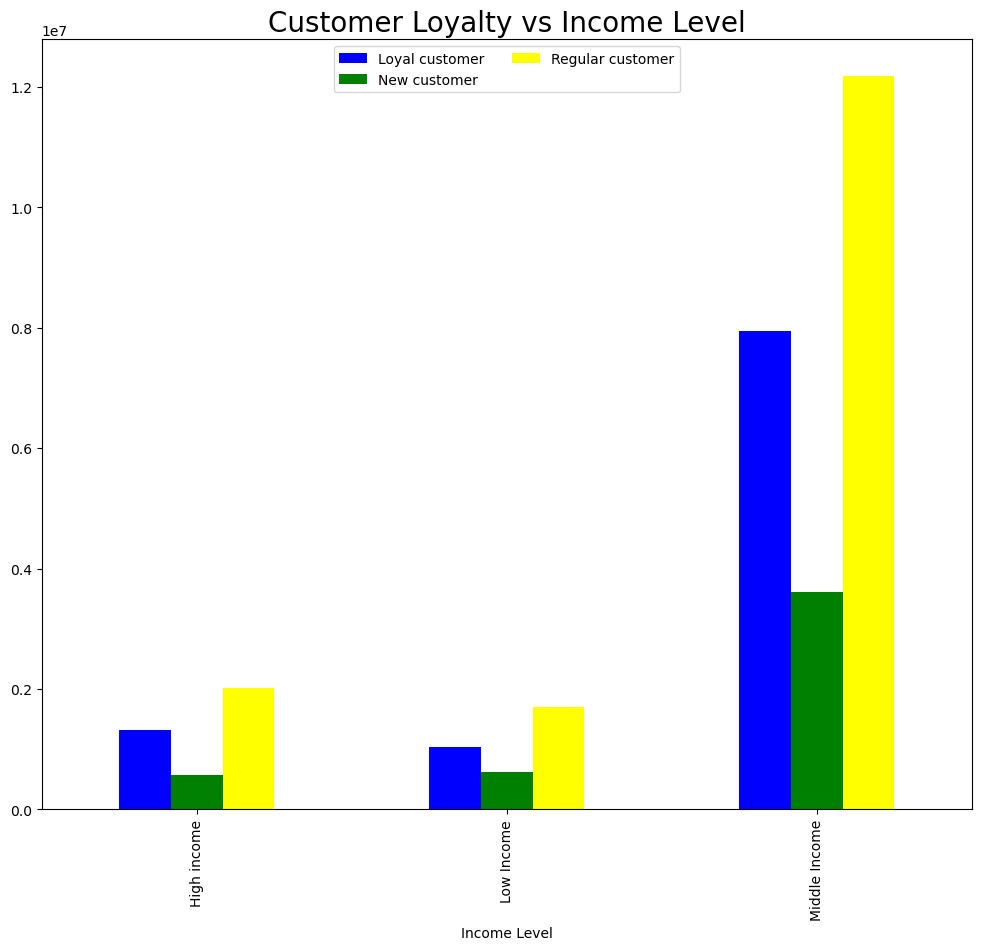

In [220]:
#Step 9: create visualization for loyalty flag and income

loyalty_income_bar = loyalty_income_bar.plot(kind ='bar', stacked = False, color = ['blue','green','yellow',], figsize = (12,10))
plt.title('Customer Loyalty vs Income Level', fontsize = 20)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Income Level")
plt.show()

In [221]:
#export loyalty purchase by income visual

loyalty_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_bar.png'))

In [222]:
#exporting High Activity Customer dataframe
df_High_Activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Instacart_Final.pkl'))

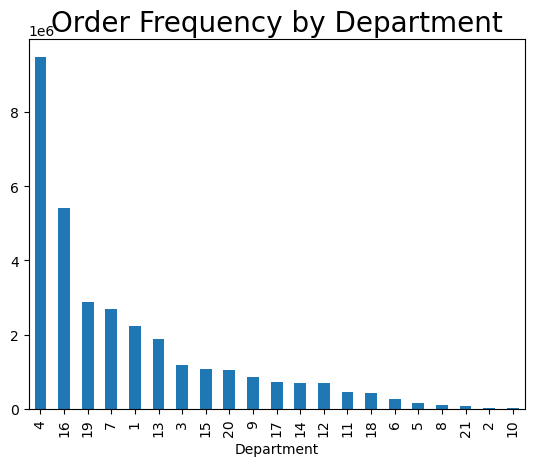

In [5]:
#create department id order frequency visualization

dept_freq = ords_prods_all['department_id'].value_counts().plot.bar()
plt.title('Order Frequency by Department', fontsize = 20)
plt.xlabel("Department")
plt.show()

In [6]:
#export deptartment freq visual

dept_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_freq_bar.png'))